✅ Threshold: 0.3
✅ Accuracy: 0.8401
✅ F1-score: 0.5053

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       247
           1       0.50      0.51      0.51        47

    accuracy                           0.84       294
   macro avg       0.70      0.71      0.70       294
weighted avg       0.84      0.84      0.84       294



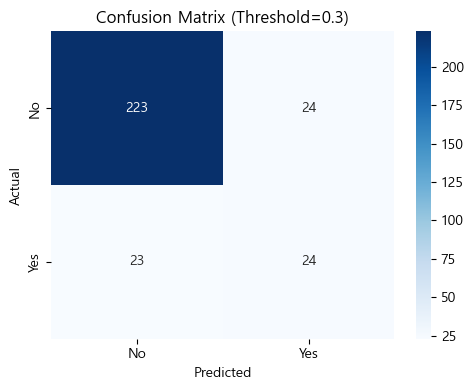

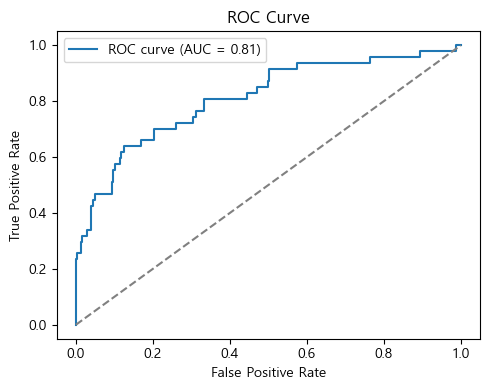

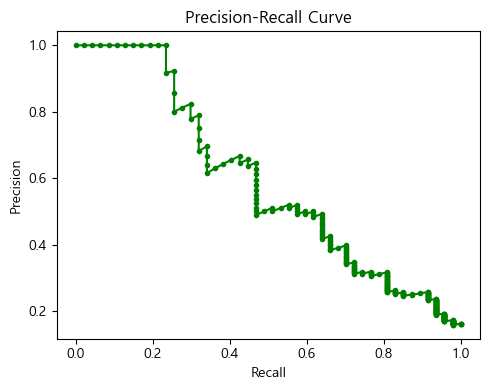

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.metrics import (
#     accuracy_score,
#     f1_score,
#     confusion_matrix, ConfusionMatrixDisplay,
#     classification_report,
#     roc_curve,
#     auc,
#     precision_recall_curve
# )

# # 1. Load dataset
# df = pd.read_csv("datasets.csv")

# # 2. Drop unnecessary columns
# df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

# # 3. Binary encode target
# df["Attrition"] = df["Attrition"].map({'Yes': 1, 'No': 0})

# # 4. Separate features/target
# X = df.drop(columns=["Attrition"])
# y = df["Attrition"]

# # 5. Identify categorical and numerical columns
# cat_cols = X.select_dtypes(include='object').columns.tolist()
# num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # 6. Preprocessing + model pipeline
# preprocessor = ColumnTransformer([
#     ("num", StandardScaler(), num_cols),
#     ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)

# ])
# pipe = Pipeline([
#     ("preprocess", preprocessor),
#     ("clf", LogisticRegression(max_iter=1000))
# ])

# # 7. Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # 8. Train model
# pipe.fit(X_train, y_train)

# # 9. Predict
# y_pred = pipe.predict(X_test)
# y_prob = pipe.predict_proba(X_test)[:, 1]
                    
# # 🔹 F1 Score
# print("📊 Classification Report:\n")
# print(classification_report(y_test, y_pred))
# print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"✅ F1-score: {f1_score(y_test, y_pred):.4f}")

# # 🔹 Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.tight_layout()
# plt.show()

# # 🔹 ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(5, 4))
# plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # 🔹 Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_prob)
# plt.figure(figsize=(5, 4))
# plt.plot(recall, precision, marker='.', color='green')
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.tight_layout()
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

# 1. 데이터 불러오기
df = pd.read_csv("datasets.csv")

# 2. 불필요한 컬럼 제거
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

# 3. 타겟 이진화
df["Attrition"] = df["Attrition"].map({'Yes': 1, 'No': 0})

# 4. 피처/타겟 분리
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# 5. 범주형/수치형 컬럼 나누기
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 6. 전처리 + 로지스틱 회귀 파이프라인
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])
pipe = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

# 7. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. 학습
pipe.fit(X_train, y_train)

# 9. 확률 예측 + threshold 조정
y_prob = pipe.predict_proba(X_test)[:, 1]
threshold = 0.30
y_pred_custom = (y_prob >= threshold).astype(int)

# 🔹 평가
print(f"✅ Threshold: {threshold}")
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"✅ F1-score: {f1_score(y_test, y_pred_custom):.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred_custom))

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.tight_layout()
plt.show()

# 🔹 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# 🔹 Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(5, 4))
plt.plot(recall, precision, marker='.', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.show()

